### Ejercicio 1: Análisis de sentimientos de comentarios de Twitter.

Del siguiente link:

https://www.kaggle.com/code/ngyptr/python-nltk-sentiment-analysis/input

Descargue la información relacionada a comentarios.

1. Revise los valores nulos o incompletos que pueda contener la información de entrada.


In [74]:
# Espacio para desarrollar el código necesario.

# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar los datos desde un archivo CSV
data = pd.read_csv('Sentiment.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
print("Primeras filas del DataFrame:")
print(data.head())

print("\nColumnas del DataFrame:")
print(data.columns)

Primeras filas del DataFrame:
   id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                

In [75]:
# Reivar los valores nulos y faltantes del DataFrame
print("\nValores nulos en cada columna:")
print(data.isnull().sum())


Valores nulos en cada columna:
id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64


## Ejercicio 2: Conteo de palabras.

Usando la información anterior realice un análisis sobre la frecuencia de palabras, mustre un histograma con el conteo de las palabras )(Recuerde realizar un preprocesamiento a la columna, para que todos las variantes de la misma palabra sean tomadas en cuenta)

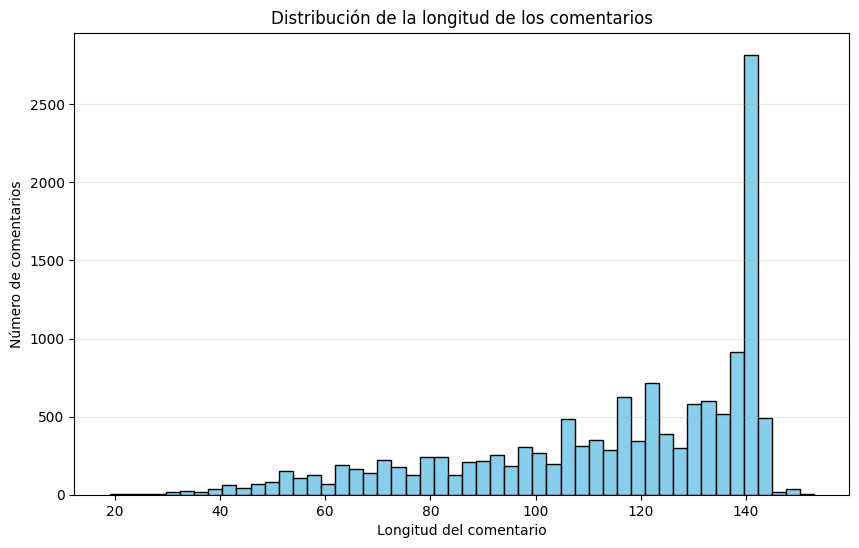

In [76]:
# Distru¿ibución de la longitud de los comentarios
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Longitud del comentario')
plt.ylabel('Número de comentarios')
plt.title('Distribución de la longitud de los comentarios')
plt.grid(axis='y', alpha=0.3)
plt.show()

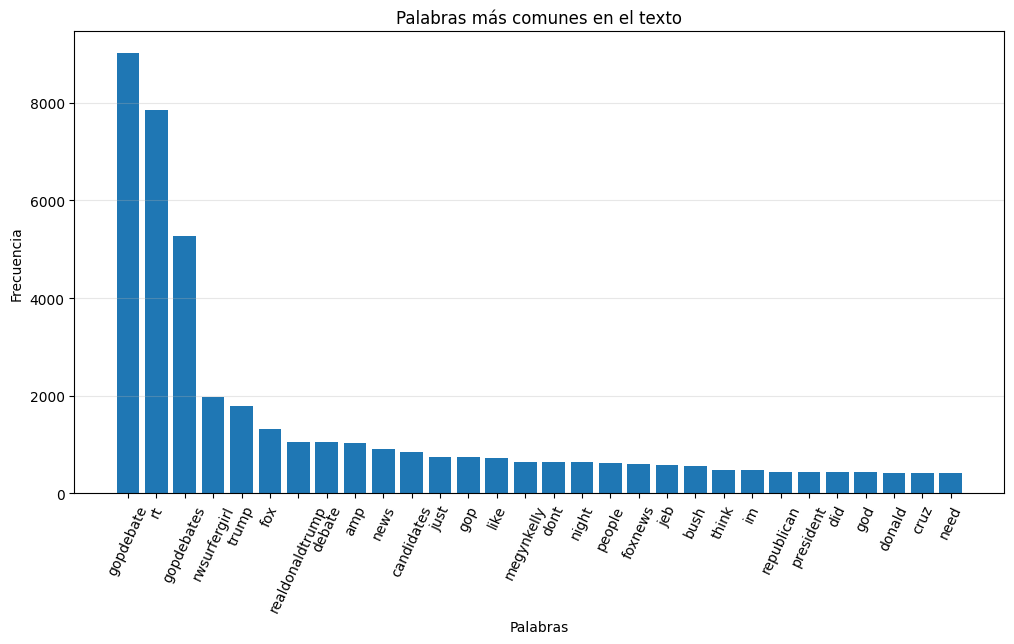

In [77]:
# Espacio para desarrollar el código necesario.

# Analisis de la frecuencia de palabras

# Limpiar el texto
data['text_clean'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Quitar palabras vacías (stop words)
vectorizer = TfidfVectorizer(stop_words='english')
stop_words = vectorizer.get_stop_words()

# Contar la frecuencia de las palabras
all_words = ' '.join(data['text_clean']).split()
all_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(all_words)

# Histograma de las palabras más comunes
most_common_words = word_freq.most_common(30)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=65)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en el texto')
plt.grid(axis='y', alpha=0.3)
plt.show()

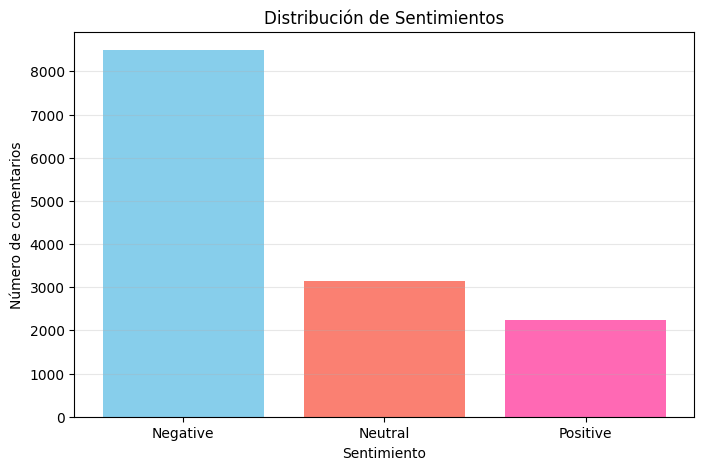

In [78]:
# Distribución de sentimientos
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon', 'hotpink'])
plt.xlabel('Sentimiento')
plt.ylabel('Número de comentarios')
plt.title('Distribución de Sentimientos')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Ejercicio 3: Análisis de sentimientos.
Usando algunas de las técnicas desarrolladas en clase, desarrolle una algoritmo que permita clasificar los comentarios como: positivos, negativos o neutros, en cada caso genere una nube de palabras.

Agregue comentarios o explicaciones breves en el códogo desarrollado.

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
# Tokenizar el texto
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # Definir el tamaño del vocabulario
tokenizer.fit_on_texts(data['text_clean']) # Ajustar el tokenizador al texto limpio
sequences = tokenizer.texts_to_sequences(data['text_clean']) # Convertir el texto a secuencias de enteros

# Tamaño del vocabulario
print(f'Tamaño del vocabulario: {len(tokenizer.word_index)}')


# Definir el maximo número de secuencias
max_length = 100

# Rellenar las secuencias para que tengan la misma longitud
X_data = pad_sequences(sequences, maxlen=max_length, 
                                 padding='post', truncating='post')

# Mapear las etiquetas de sentimiento a valores numéricos
y_data = data['sentiment'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0}).values

Tamaño del vocabulario: 19491


In [81]:
# Definir el tamaño del vocabulario
vocab_size = len(tokenizer.word_index) + 1
# Dimensiones de embedding
embedding_dim = 16
# Número de LSTM units 
lstm_units = 32

# Construir el modelo (keras)
model = keras.Sequential([

    keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=128,         # mejor que 50
        input_length=max_length
    ),

    keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=False, dropout=0.3)
    ),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(3, activation='softmax')   # 3 clases
])

# Construir el modelo (keras)
model.build(input_shape=(None, max_length))

# Resumen del modelo
model.summary()
# Numero total de parámetrod enterenables
total_params = model.count_params()
print(f'Número total de parámetros entrenables: {total_params}')

/home/alanp/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 128)       │     2,494,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,243 (9.93 MB)

 Trainable params: 2,602,243 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

Número total de parámetros entrenables: 2602243


In [82]:
# Definir el optimizador
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

print("Modelo compilado correctamente.")

Modelo compilado correctamente.


In [85]:
# Entrenar el modelo
history = model.fit(
    X_data, y_data,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
)

Epoch 1/10


347/347 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.7560 - loss: 0.6072 - val_accuracy: 0.7110 - val_loss: 0.6723
Epoch 2/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - accuracy: 0.7915 - loss: 0.5304 - val_accuracy: 0.6980 - val_loss: 0.6989
Epoch 3/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 39s 112ms/step - accuracy: 0.8163 - loss: 0.4580 - val_accuracy: 0.7059 - val_loss: 0.7811
Epoch 4/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - accuracy: 0.8444 - loss: 0.3989 - val_accuracy: 0.6832 - val_loss: 0.8113
Epoch 5/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.8636 - loss: 0.3501 - val_accuracy: 0.6710 - val_loss: 0.9227
Epoch 6/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.8804 - loss: 0.3072 - val_accuracy: 0.6919 - val_loss: 1.0031
Epoch 7/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.8955 - loss: 0.2771 - val_accuracy: 0.6861 - val_loss: 1.1009
Epoch 8/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.9015 - loss: 0.2497 - val_

In [86]:
# Metricas finales
final_accuracy = history.history['accuracy'][-1]
final_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final training accuracy after 50 epochs: {final_accuracy*100:.2f}%")
print(f'Final loss: {final_loss:.4f}')
print(f"Final validation accuracy after 50 epochs: {final_val_accuracy*100:.2f}%")
print(f'Final validation loss: {final_val_loss:.4f}')

Final training accuracy after 50 epochs: 91.88%
Final loss: 0.2033
Final validation accuracy after 50 epochs: 67.64%
Final validation loss: 1.3119


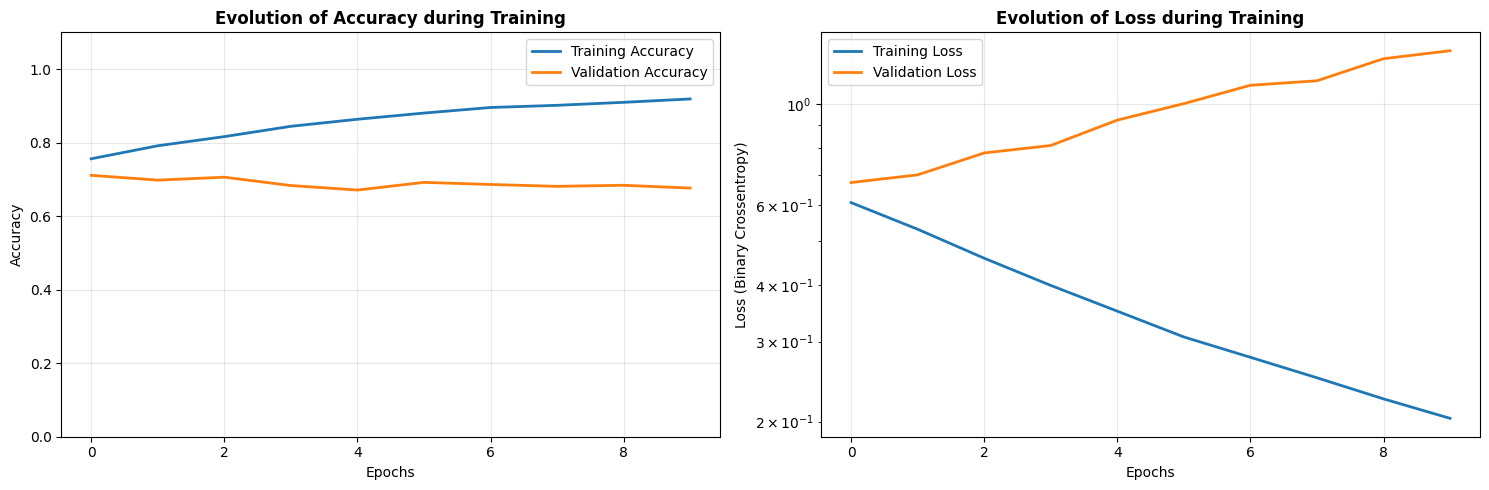

In [87]:
plt.figure(figsize=(15, 5))

# 1. CURVA DE ACCURACY
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)

plt.title('Evolution of Accuracy during Training', fontweight='bold', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

# 2. LOSS CURVE
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)

plt.title('Evolution of Loss during Training', fontweight='bold', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show() 

## Ejercicio 4. Clasificadores de documentos.

1. Diseñe un algoritmo para clasificar documentos.
2. Agregue detalles sobre su funcionamiento.
3. Enumere las librerias que podria usar y explique el por qué de su elección.
4. En caso de usar un modelo basado en Inteligencia Artificial explique su funcinamiento.


In [ ]:
# Espacio para desarrollar el código necesario.

